# EDA (Análisis Exploratorio de Datos)

## Introducción

### Contexto del Problema
En Buenos Aires, los siniestros viales son una preocupación creciente debido al alto volumen de tráfico y la densidad poblacional. Estos incidentes pueden tener consecuencias graves, desde daños materiales hasta pérdidas humanas. Cada año, miles de personas pierden la vida en accidentes de tránsito, lo que subraya la necesidad de medidas efectivas para mejorar la seguridad vial.

### Objetivos del Análisis
El objetivo principal de este análisis es identificar patrones y tendencias en los siniestros viales ocurridos en Buenos Aires durante el periodo 2016-2021. A través de este análisis, buscamos:
1. **¿Cómo impactó la pandemia de COVID-19 en la cantidad de accidentes viales?**

2. **¿Existen patrones estacionales que influyen en la cantidad de accidentes?**

3. **¿Qué días y horarios presentan mayor riesgo de accidentes?**

4. **¿Cuáles son las zonas con mayor incidencia de accidentes?**

5. **¿Qué tipo de vías presentan mayor riesgo de accidentes?**

6. **¿Cuál es el perfil de las víctimas de accidentes viales?**

7. **¿Qué grupos son más vulnerables en los accidentes viales?**

8. **¿Existen lugares específicas con alta repetición de accidentes?**

### Metodología
Para alcanzar estos objetivos, se realizarán las siguientes etapas de análisis:
1. **Carga y Limpieza de Datos**: Importación de los datos y eliminación de valores nulos y duplicados. Este punto ya fue realizado en el archivo ETL.ipynb.
2. **Análisis Descriptivo**: Exploración de la distribución de las variables y visualización de datos.
3. **Análisis de Patrones y Tendencias**: Identificación de patrones temporales y espaciales en los siniestros viales.
4. **Conclusiones**: Resumen de los hallazgos y recomendaciones para mejorar la seguridad vial en Buenos Aires.

Vamos a sumergirnos en el análisis y descubrir insights valiosos que puedan contribuir a mejorar la seguridad vial en Buenos Aires.

In [2207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.colors import LinearSegmentedColormap

In [2208]:
hechos = pd.read_csv("hechos_ETL.csv")
victimas = pd.read_csv("victimas_ETL.csv", encoding='utf-8')
comunas = pd.read_csv("comunas_ETL.csv")

In [2209]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
hechos['fecha'] = pd.to_datetime(hechos['fecha'])
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 694 non-null    object        
 1   cantidad_victimas  694 non-null    int64         
 2   fecha              694 non-null    datetime64[ns]
 3   anio               694 non-null    int64         
 4   mes                694 non-null    int64         
 5   dia                694 non-null    int64         
 6   franja_hora        694 non-null    int64         
 7   lugar_hecho        694 non-null    object        
 8   tipo_calle         694 non-null    object        
 9   calle              694 non-null    object        
 10  cruce              694 non-null    object        
 11  comuna             694 non-null    int64         
 12  longitud           694 non-null    float64       
 13  latitud            694 non-null    float64       
 14  participan

In [2210]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            717 non-null    object
 1   rol_victima   717 non-null    object
 2   sexo_victima  717 non-null    object
 3   edad_victima  717 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 22.5+ KB


In [2211]:
comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comuna   15 non-null     int64 
 1   barrios  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


**Outliers:**
Un outlier es un valor en un conjunto de datos que se desvia significativamente de los demás valores. Pueden surgir debido a errores de medición, variaciones naturales en los datos o eventos extraordinarios. Es importante identificar estos valores porque pueden influir en el análisis y gráficos.

**cantidad_victimas**

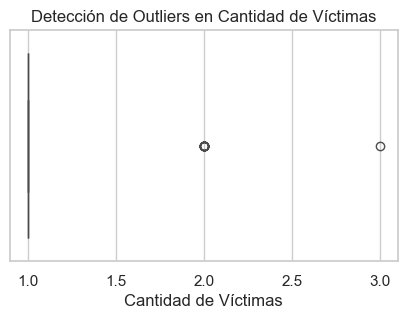

In [2212]:
plt.figure(figsize=(5,3))
sns.boxplot(data=hechos, x='cantidad_victimas')
plt.title('Detección de Outliers en Cantidad de Víctimas')
plt.xlabel('Cantidad de Víctimas')
plt.show()


Notamos que la mayor cantidad de datos se acumulan en 1 victima por accidente, luego hay una concentración m'as baja en 2 victimas y por ultima una pequeña en 3. Dado que en el ETL, al analizar el numero de id que se encontraban duplicados, investigamos que había 21 id duplicados, tratandoe todos ellos de accidentes con 2 personas a excepción de 1 con 3 victimas fatales, haremos lo propio con la cantidad de victimas en la tabla hechos para ver si efectivamente se trata de acidentes múltiples o no.

In [2213]:
# Agrupar por id y contar las víctimas
#agrupados = hechos.groupby('id')['cantidad_victimas'].sum().reset_index()

# Filtrar accidentes con más de una víctima
#accidentes_multiples = agrupados[agrupados['cantidad_victimas'] > 1]
#print(accidentes_multiples)

# Calcular la media y desviación estándar
outlier_cant_victimas = hechos['cantidad_victimas'].mean()+(3*hechos['cantidad_victimas'].std())
cant_victimas_media = hechos['cantidad_victimas'].mean()

print(f'\nPromedio: {cant_victimas_media:.2f}')
print(f"Número de Víctima mayor a ={outlier_cant_victimas:.2f} son Outliers")
print(f"Accidentes con más de una victima: \t{hechos['cantidad_victimas'][hechos['cantidad_victimas']>1].count()}")
print(f"Accidentes totales: \t\t\t{hechos['cantidad_victimas'].count()}")


Promedio: 1.03
Número de Víctima mayor a =1.57 son Outliers
Accidentes con más de una victima: 	20
Accidentes totales: 			694


En este caso notamos que sí, efectivamente se tratan de un outlier debido a una variación natural de los datos (tal como vimos en el ETL de vcitimas, se trata de 20 accidentes con más de una victima), en este caso, accidentes múltiples. 

**anio:**

In [2214]:
anios_agrupados = hechos.groupby('anio').size()
print("AÑOS")
print('\nmedia: ',anios_agrupados.mean())
print(f'desvio: {anios_agrupados.std():.2f}')
print(f'limite inferior: {anios_agrupados.mean()-(3*anios_agrupados.std()):.2f}; valor mínimo{anios_agrupados.min():.2f}')
print(f'limite superior: {anios_agrupados.mean()+(3*anios_agrupados.std()):.2f}; valor Máximo{anios_agrupados.max():.2f}')

AÑOS

media:  115.66666666666667
desvio: 26.85
limite inferior: 35.13; valor mínimo78.00
limite superior: 196.20; valor Máximo143.00


Dado que el valor mínimo es mayor al límite inferior y el máximo menor al limite superior concluiomos que no hay outliers en este campo.

**mes**

In [2215]:
meses_agrupados = hechos.groupby('mes').size()
print("MESES")
print('\nmedia: ',meses_agrupados.mean())
print(f'desvio: {meses_agrupados.std():.2f}')
print(f'limite inferior: {meses_agrupados.mean()-(3*meses_agrupados.std()):.2f}; valor mínimo{meses_agrupados.min():.2f}')
print(f'limite superior: {meses_agrupados.mean()+(3*meses_agrupados.std()):.2f}; valor Máximo{meses_agrupados.max():.2f}')

MESES

media:  57.833333333333336
desvio: 8.68
limite inferior: 31.78; valor mínimo47.00
limite superior: 83.89; valor Máximo77.00


Dado que el valor mínimo es mayor al límite inferior y el máximo menor al limite superior concluiomos que no hay outliers en este campo.

**dia**

In [2216]:
dias_agrupados = hechos.groupby('dia').size()
print("DIAS")
print('\nmedia: ',dias_agrupados.mean())
print(f'desvio: {dias_agrupados.std():.2f}')
print(f'limite inferior: {dias_agrupados.mean()-(3*dias_agrupados.std()):.2f}; valor mínimo{dias_agrupados.min():.2f}')
print(f'limite superior: {dias_agrupados.mean()+(3*dias_agrupados.std()):.2f}; valor Máximo{dias_agrupados.max():.2f}')

DIAS

media:  22.387096774193548
desvio: 4.28
limite inferior: 9.55; valor mínimo13.00
limite superior: 35.22; valor Máximo31.00


Dado que el valor mínimo es mayor al límite inferior y el máximo menor al limite superior concluiomos que no hay outliers en este campo.

**franja_hora**

In [2217]:
horas_agrupados = hechos.groupby('franja_hora').size()
print("FRANJA HORA")
print('\nmedia: ',horas_agrupados.mean())
print(f'desvio: {horas_agrupados.std():.2f}')
print(f'limite inferior: {horas_agrupados.mean()-(3*horas_agrupados.std()):.2f}; valor mínimo{horas_agrupados.min():.2f}')
print(f'limite superior: {horas_agrupados.mean()+(3*horas_agrupados.std()):.2f}; valor Máximo{horas_agrupados.max():.2f}')

FRANJA HORA

media:  28.916666666666668
desvio: 5.98
limite inferior: 10.98; valor mínimo17.00
limite superior: 46.85; valor Máximo41.00


Dado que el valor mínimo es mayor al límite inferior y el máximo menor al limite superior concluiomos que no hay outliers en este campo.

**latitud y longitud**

In [2218]:
# VER OUTLIERS DE UBICACION

outliers_latitud = hechos[(hechos['latitud'] < -35) | (hechos['latitud'] > -34)]
outliers_longitud = hechos[(hechos['longitud'] < -59) | (hechos['longitud'] > -58)]
print(outliers_latitud)
print(outliers_longitud)

Empty DataFrame
Columns: [id, cantidad_victimas, fecha, anio, mes, dia, franja_hora, lugar_hecho, tipo_calle, calle, cruce, comuna, longitud, latitud, participantes, victima, acusado]
Index: []
Empty DataFrame
Columns: [id, cantidad_victimas, fecha, anio, mes, dia, franja_hora, lugar_hecho, tipo_calle, calle, cruce, comuna, longitud, latitud, participantes, victima, acusado]
Index: []


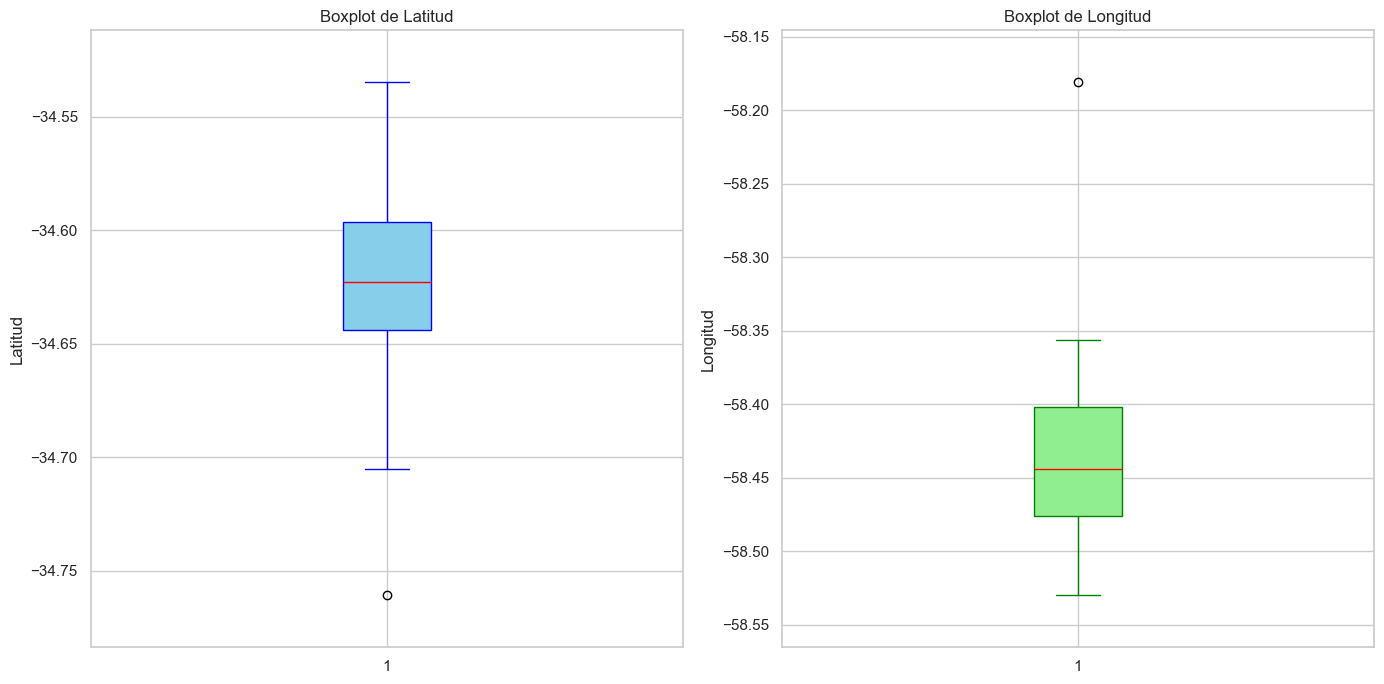

In [2219]:
# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot de latitud con estilo mejorado
axs[0].boxplot(hechos['latitud'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), 
               medianprops=dict(color='red'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
axs[0].set_title('Boxplot de Latitud')
axs[0].set_ylabel('Latitud')
axs[0].grid(True)

# Boxplot de longitud con estilo mejorado
axs[1].boxplot(hechos['longitud'], patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'), 
               medianprops=dict(color='red'), whiskerprops=dict(color='green'), capprops=dict(color='green'))
axs[1].set_title('Boxplot de Longitud')
axs[1].set_ylabel('Longitud')
axs[1].grid(True)

# Ajustar el rango de los ejes para mostrar mejor la concentración
lat_min, lat_max = hechos['latitud'].min(), hechos['latitud'].max()
lon_min, lon_max = hechos['longitud'].min(), hechos['longitud'].max()

axs[0].set_ylim(lat_min - (lat_max - lat_min) * 0.1, lat_max + (lat_max - lat_min) * 0.1)
axs[1].set_ylim(lon_min - (lon_max - lon_min) * 0.1, lon_max + (lon_max - lon_min) * 0.1)

# Mostrar los boxplots
plt.tight_layout()
plt.show()



En el análisis de los datos de latitud y longitud puedo corroborar en los gráficos boxplots lo que busqué anteriormente y es que en este caso no hay outliers (mejor dicho, los que encontré los modifiqué manualmente que eran los valores en donde figuraba un ".", y dado que eran pocos valores los fui buscando en google maps con los datos de calle, cruce, altura, etc). Los boxplots muestran que no hay valores atípicos significativos, lo que sugiere que los datos están bien distribuidos y son consistentes. Ajusté el rango de los ejes para resaltar la concentración de los datos en puntos específicos.

**edad_victima**

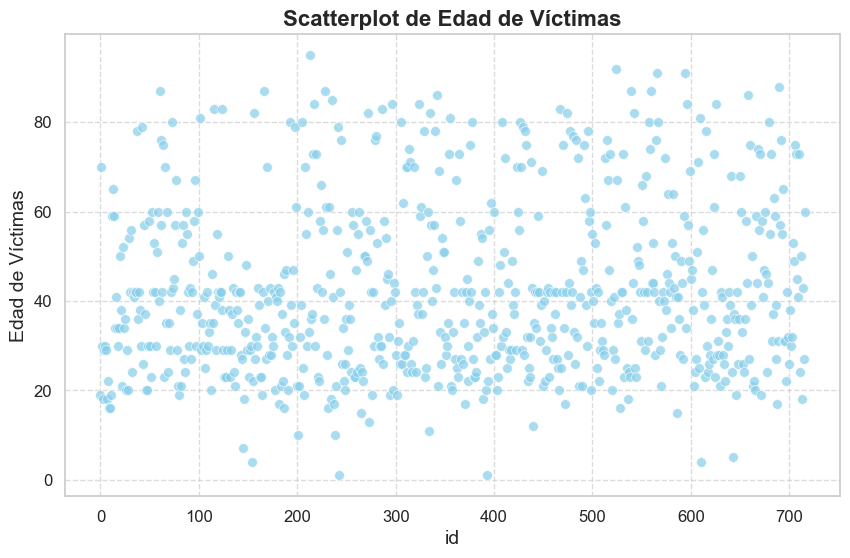

In [2220]:
# Crear la figura y el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=victimas, x=victimas.index, y='edad_victima', color='skyblue', s=50, alpha=0.7)

# Título y etiquetas
plt.title('Scatterplot de Edad de Víctimas', fontsize=16, fontweight='bold')
plt.xlabel('id', fontsize=14)
plt.ylabel('Edad de Víctimas', fontsize=14)

# Mejoras estéticas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



Al observar el scatterplot, se ve que los datos de edad están bastante concentrados, sin puntos aislados que podrían ser considerados outliers. Esto sugiere que no hay edades significativamente diferentes del resto, ningún valor fuera de la lógica.

**Duplicados**

In [2221]:
# Verificar duplicados
duplicados = hechos.duplicated().sum()
print(f'Hemos encontrado {duplicados} registros duplicados en tabla "Hechos".')
duplicados2 = victimas.duplicated().sum()
print(f'Hemos encontrado {duplicados2} registros duplicados en tabla "Victimas".')
duplicados3 = comunas.duplicated().sum()
print(f'Hemos encontrado {duplicados3} registros duplicados en tabla "Comunas".')


Hemos encontrado 0 registros duplicados en tabla "Hechos".
Hemos encontrado 0 registros duplicados en tabla "Victimas".
Hemos encontrado 0 registros duplicados en tabla "Comunas".


**Valores Faltantes**

In [2222]:
# Resumen de valores nulos
nulos= hechos.isnull().sum()
print(f'Hemos encontrado {nulos} registros duplicados en tabla "Hechos".')
nulos2= victimas.isnull().sum()
print(f'Hemos encontrado {nulos2} registros duplicados en tabla "Victimas".')
nulos3= comunas.isnull().sum()
print(f'Hemos encontrado {nulos3} registros duplicados en tabla "Comunas".')
# Imputación de valores nulos si es necesario
#df_hechos2.fillna({'columna': 'valor'}, inplace=True)


Hemos encontrado id                   0
cantidad_victimas    0
fecha                0
anio                 0
mes                  0
dia                  0
franja_hora          0
lugar_hecho          0
tipo_calle           0
calle                0
cruce                0
comuna               0
longitud             0
latitud              0
participantes        0
victima              0
acusado              0
dtype: int64 registros duplicados en tabla "Hechos".
Hemos encontrado id              0
rol_victima     0
sexo_victima    0
edad_victima    0
dtype: int64 registros duplicados en tabla "Victimas".
Hemos encontrado comuna     0
barrios    0
dtype: int64 registros duplicados en tabla "Comunas".


Crearé paletas de colores para luego usar también en el dashboard, que tengan que ver con los colores que usa la misma ciudad de buenos aires para sus presentaciones. Dichos colores los conseguí en el siguiente link. https://buenosaires.gob.ar/sites/default/files/2024-04/Manual%20de%20marca%20GCBA.pdf

In [2223]:
# Crear una paleta de gradiente personalizada
colores = ["#FFCC00","#153244", "#8DE2D6"]
n_colores_12 = len(hechos['mes'].unique()) # Número de meses únicos
gradiente_12 = LinearSegmentedColormap.from_list("custom_palette", colores)
#paleta con 3 colores
paleta1 = sns.color_palette(colores, n_colors=n_colores_12)
#paleta de colores personalizada con 12 colores
paleta2 = sns.color_palette(gradiente_12(np.linspace(0, 1, 12)))
# Crear la paleta de 6 colores
n_colores_6 = len(hechos['anio'].unique())  # Número de años únicos
gradiente_6 = LinearSegmentedColormap.from_list("custom_palette", colores, N=n_colores_6)
paleta3 = sns.color_palette(gradiente_6(np.linspace(0, 1, n_colores_6)))



## TIEMPO

Se trata de un factor crucial para investigar, tanto la evolución en el tiempo de accidentes, como las épocas de mayor accidentes a los horarios. Conocer estos detalles es crucial a la hora de evaluar si las acciones que se vienen tomando en materia de prevención son adecuadas y efectivas o no y que nuevas problemáticas surgen para así poder proponer mejoras.

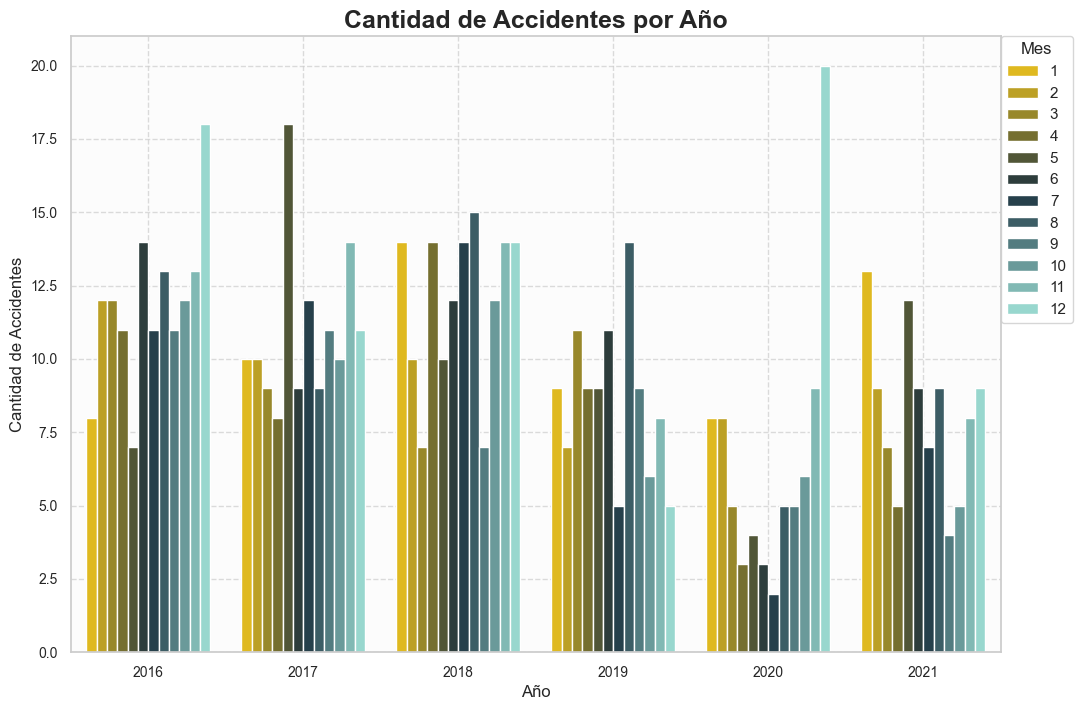

In [2224]:
sns.set_theme(style="whitegrid")

# Gráfico de barras para la cantidad de accidentes por año y por mes
plt.figure(figsize=(12, 8))
sns.countplot(data=hechos, x='anio', hue='mes', palette=paleta2)

# Título y etiquetas
plt.title('Cantidad de Accidentes por Año', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Accidentes', fontsize=12)
plt.legend(title='Mes', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

# Ajuste de estilo y estéticas
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#FCFCFC')  # Fondo Off-White

# Mostrar el gráfico
plt.show()

**Insight #1:** 
Al analizar la cantidad de accidentes por año, se observa una significativa disminución en el año 2020. Esta caída se alínea con el período de confinamiento impuesto debido a la pandemia de COVID-19, que comenzó el 20 de marzo de 2020 en toda la Argentina y gran parte del mundo y se extendió durante gran parte del año, con sus levantamientos y endurecimiento de medidas lo que explica junto con la estacionalidad una caída que hacia fin de año repunta dado el relajamiento de medidas de encierro. Como era lógico pensar, la reducción de la movilidad y las restricciones en las actividades diarias resultaron en menos accidentes de tráfico, práctica que no tiene sentido como medida real para disminuir los acidentes.

Ahora, pasamos a investigar la estacionalidad de los accidentes. Esta observación nos lleva a preguntarnos si hay patrones estacionales en la ocurrencia de accidentes. Para explorar esto, analicemos cómo varía la cantidad de accidentes a lo largo de los meses del año. Este análisis nos permitirá identificar picos y valles en la cantidad de accidentes, lo que podría estar relacionado con factores como el clima, festividades o cambios en el comportamiento de los conductores.

<Figure size 1500x600 with 0 Axes>

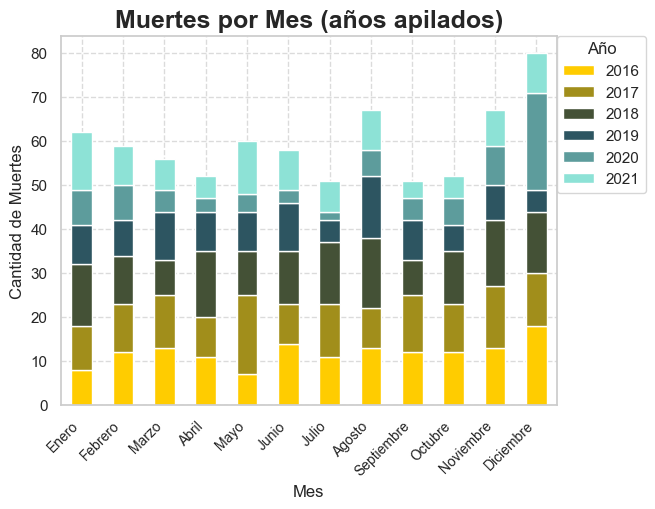

In [2225]:
sns.set_theme(style="whitegrid")

# DataFrame pivotado para las muertes por mes y año
muertes_por_mes_y_anio = hechos.pivot_table(index='mes', columns='anio', values='cantidad_victimas', aggfunc='sum')

# Distribución de muertes por mes y año
plt.figure(figsize=(15, 6))
ax = muertes_por_mes_y_anio.plot(kind='bar', stacked=True, cmap=gradiente_6)

# Ajustar etiquetas del eje x para mostrar los nombres de los meses en diagonal
ax.set_xticklabels([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45, ha='right', fontsize=10)

# Título y etiquetas
plt.title('Muertes por Mes (años apilados)', fontsize=18, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Muertes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar leyenda para que esté fuera del gráfico
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

# Mostrar el gráfico
plt.show()


**Insight #2:**
Al analizar la cantidad de accidentes por mes, se observan picos significativos en noviembre, diciembre y agosto. Estos picos pueden estar relacionados con varios factores:

Noviembre y Diciembre: La suba de temperaturas, junto con las fiestas de fin de año, puede llevar a un aumento en el tráfico, a veces asociado al consumo de alcohol y/o otras sustancias y, por ende, en la cantidad de accidentes. También son los meses de mayor estrés y movimiento, lo que incrementa la probabilidad de accidentes. Habría que indagar tanto el consumo de alcohol/sustancias psicoactivas en estos accidentes (victima y acusado).

Agosto: El aumento de accidentes en agosto es notable y puede ser atribuido a varias causas. Durante este mes, hay un incremento en las actividades recreativas y eventos al aire libre, lo que aumenta el número de peatones y ciclistas. Además, las lluvias ocasionales pueden afectar la visibilidad y las condiciones de las vias de transito contribuyendo a un mayor riesgo de accidentes. Esa también podría ser otra línea de averiguación, la relación climatologica con accidentes.

**FRANJA HORARIA:** Investigamos ahora según día y franja horaria los momentos de mayor accidentes.

In [2226]:
# Crear la columna fecha concatenando año, mes y día
hechos['fecha'] = pd.to_datetime(hechos['anio'].astype(str) + '-' + hechos['mes'].astype(str) + '-' + hechos['dia'].astype(str))

# Crear la columna dia_semana
hechos['dia_semana'] = hechos['fecha'].dt.day_name()

# Verificar la conversión
print(hechos[['fecha', 'dia_semana']].head())



       fecha dia_semana
0 2016-01-01     Friday
1 2016-01-02   Saturday
2 2016-01-03     Sunday
3 2016-01-10     Sunday
4 2016-01-21   Thursday


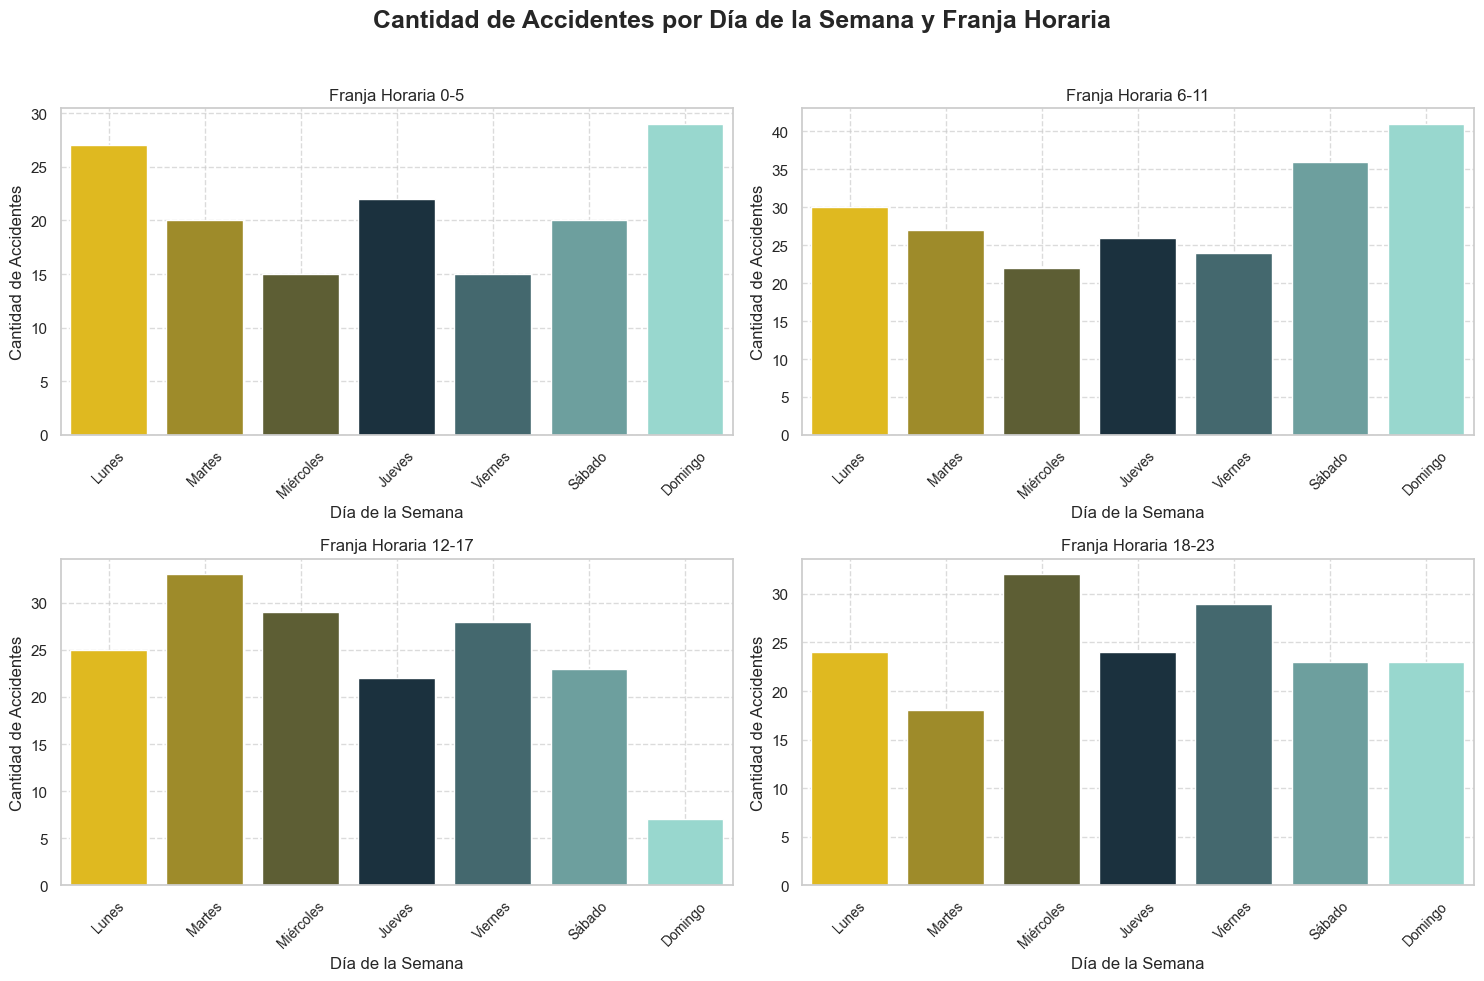

In [2227]:
from matplotlib.ticker import FixedLocator

# Crear la paleta de 7 colores
n_colores_7 = len(hechos['dia_semana'].unique())  # Número de años únicos
gradiente_7 = LinearSegmentedColormap.from_list("custom_palette", colores, N=n_colores_7)
paleta4 = sns.color_palette(gradiente_7(np.linspace(0, 1, n_colores_7)))

# Definir las franjas horarias
franjas = [(0, 5), (6, 11), (12, 17), (18, 23)]
labels_franjas = ['0-5', '6-11', '12-17', '18-23']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cantidad de Accidentes por Día de la Semana y Franja Horaria', fontsize=18, fontweight='bold')

for i, (start, end) in enumerate(franjas):
    ax = axes[i // 2, i % 2]
    subset = hechos[(hechos['franja_hora'] >= start) & (hechos['franja_hora'] <= end)]
    sns.countplot(data=subset, x='dia_semana', palette=paleta4, order=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ], ax=ax)
    ax.set_title(f'Franja Horaria {labels_franjas[i]}')
    ax.set_xlabel('Día de la Semana')
    ax.set_ylabel('Cantidad de Accidentes')
    ax.xaxis.set_major_locator(FixedLocator(range(7)))
    ax.set_xticklabels(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insight #3:**
La concentración de accidentes nocturnos en fines de semana es alarmante: Los gráficos muestran un claro aumento de accidentes los viernes y sábados en la madrugada (entre las 0 y las 5 AM). Esto sugiere una fuerte relación entre las salidas nocturnas y el riesgo de accidentes, posiblemente debido al consumo de alcohol y la fatiga.

Este insight subraya la importancia de implementar medidas de seguridad vial específicas, como controles de alcoholemia y campañas de concientización en esos horarios críticos.

## ESPACIO

Se trata de el otro factor vital para investigar, las zonas de mayor accidentes, tipo de vía, y horarios según comunas son tan solo algunas de las interrogantes que surgen. Conocer estos detalles es crucial a la hora de evaluar si las acciones que se vienen tomando en materia de prevención son adecuadas y efectivas o no y que nuevas problemáticas aprecen para así poder proponer mejoras.

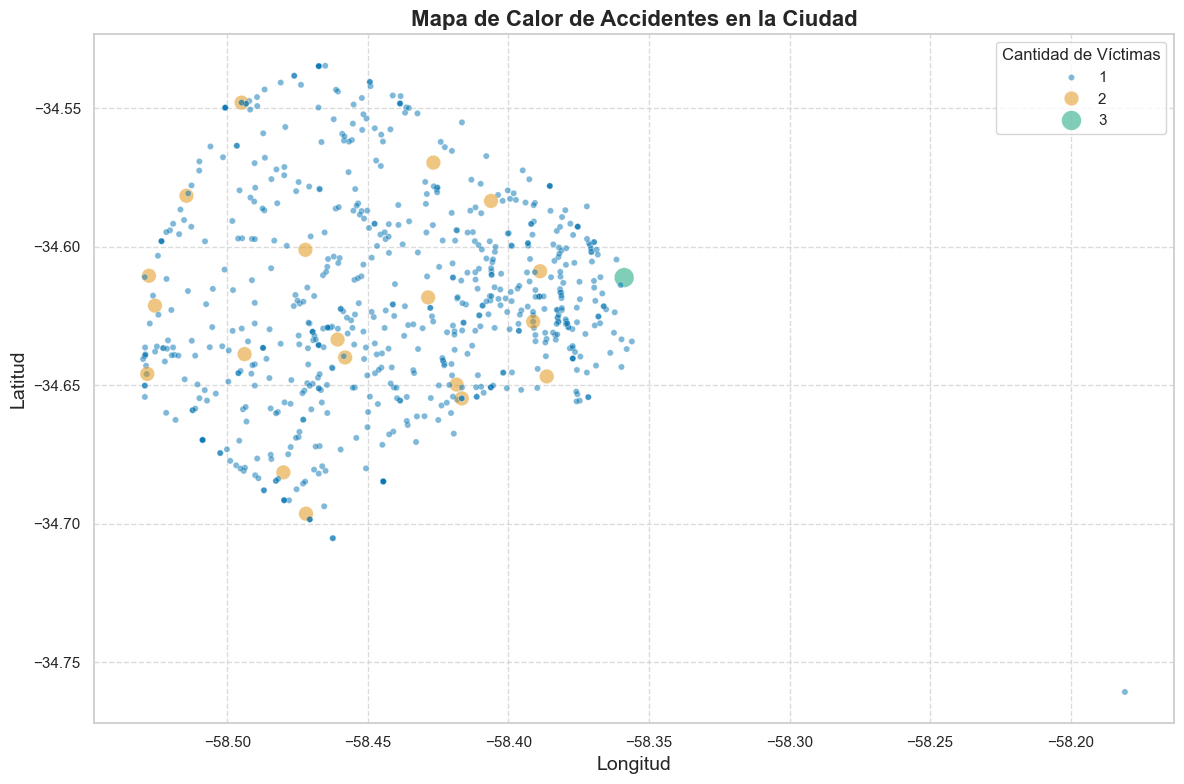

In [2228]:
#sns.set_theme(style="white")

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hechos, x='longitud', y='latitud', hue='cantidad_victimas', palette='colorblind', size='cantidad_victimas', sizes=(20, 200), alpha=0.5)

# Título y etiquetas
plt.title('Mapa de Calor de Accidentes en la Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)
plt.legend(title='Cantidad de Víctimas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Insight #4:**
Al observar el mapa, puedes identificar claramente las zonas con la mayor densidad de accidentes, ya que los puntos más grandes y de colores más intensos indican una mayor cantidad de víctimas en esas ubicaciones. Esto sugiere que hay áreas específicas en la ciudad que son particularmente peligrosas para el tráfico, como ciertos cruces, intersecciones o avenidas principales. Hay a su vez un dato en particular que parece alejado del resto y es porque dicho accidente occurió en AU BUENOS AIRES - LA PLATA KM. 4. Es decir, al mirar en el mapa dice Berazategui, Provincia de Buenos Aires, es decir, no pertenece técnicamente a la Ciudad de Buenos Aires. 

Para profundizar más, se podría analizar factores que contribuyen a los accidentes en estas zonas, como la infraestructura vial, la señalización, etc.

**Comunas**

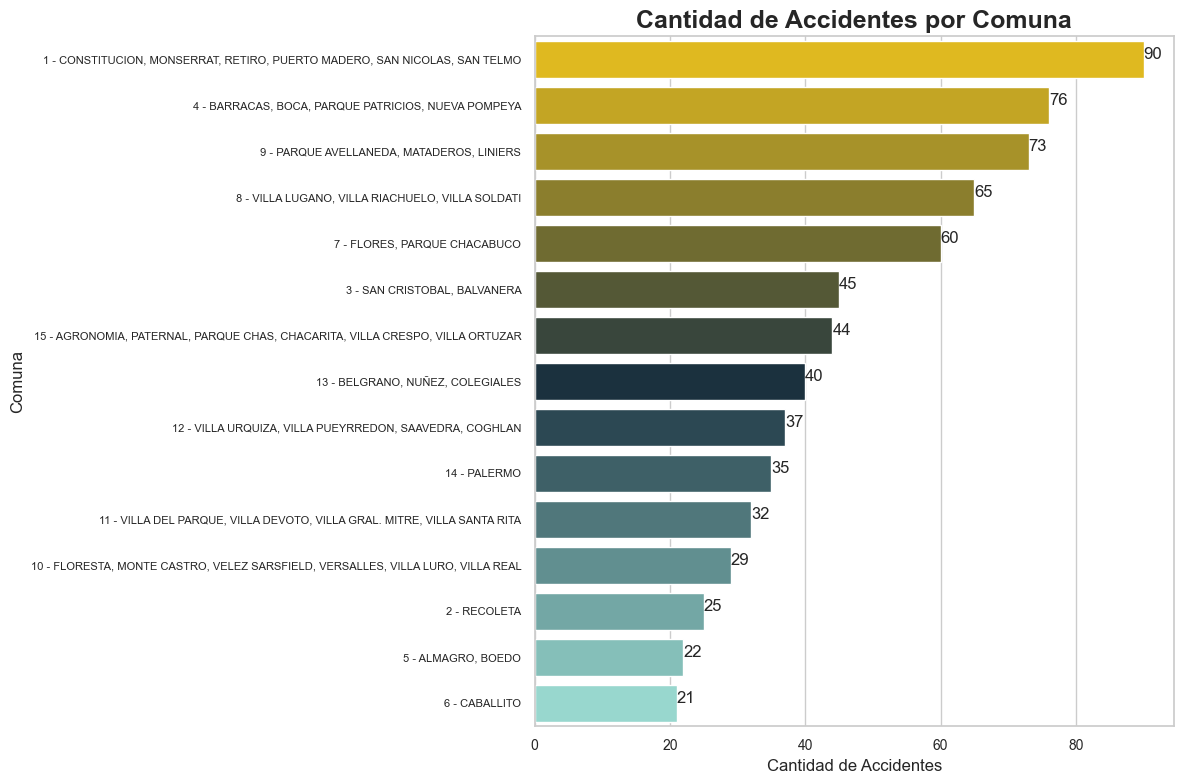

In [2229]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por comuna y contar la cantidad de accidentes
accidentes_por_comuna = hechos.groupby('comuna').size().reset_index(name='cantidad_accidentes')

# Unir los datos de accidentes con los nombres de las comunas
accidentes_por_comuna = accidentes_por_comuna.merge(comunas, on='comuna', how='left')

# Ordenar las comunas de más a menos accidentes
accidentes_por_comuna = accidentes_por_comuna.sort_values(by='cantidad_accidentes', ascending=False)

# Crear una columna combinada para mostrar el número y nombre de la comuna
accidentes_por_comuna['comuna_nombre'] = accidentes_por_comuna['comuna'].astype(str) + ' - ' + accidentes_por_comuna['barrios']

# Crear la paleta de 15 colores
n_colores_15 = len(hechos['comuna'].unique())  # Número de años únicos
gradiente_15 = LinearSegmentedColormap.from_list("custom_palette", colores, N=n_colores_15)
paleta5 = sns.color_palette(gradiente_15(np.linspace(0, 1, n_colores_15)))


# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(data=accidentes_por_comuna, y='comuna_nombre', x='cantidad_accidentes', palette=paleta5)

# Añadir anotaciones de la cantidad de accidentes
for index, value in enumerate(accidentes_por_comuna['cantidad_accidentes']):
    plt.text(value, index, str(value))

plt.title('Cantidad de Accidentes por Comuna', fontsize=18, fontweight='bold')
plt.xlabel('Cantidad de Accidentes', fontsize=12)
plt.ylabel('Comuna', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.show()



**Insight #5:** Comunas con Mayor Cantidad de Accidentes
El análisis muestra que ciertas comunas tienen una cantidad desproporcionadamente alta de accidentes. Notablemente, las comunas con mayor densidad de población y tráfico, como la Comuna 1 (que incluye áreas céntricas como San Nicolás y Monserrat) y la Comuna 3 (Balvanera y San Cristóbal), destacan como las más peligrosas. Se podría investigar en un futuro la infraestructura vial de estas comunas (señalización, iluminación adecuada o cruces peligrosos).


Patrones de Tráfico: Analizar los patrones de tráfico y los horarios pico para identificar períodos de mayor riesgo y optimizar la gestión del tráfico.

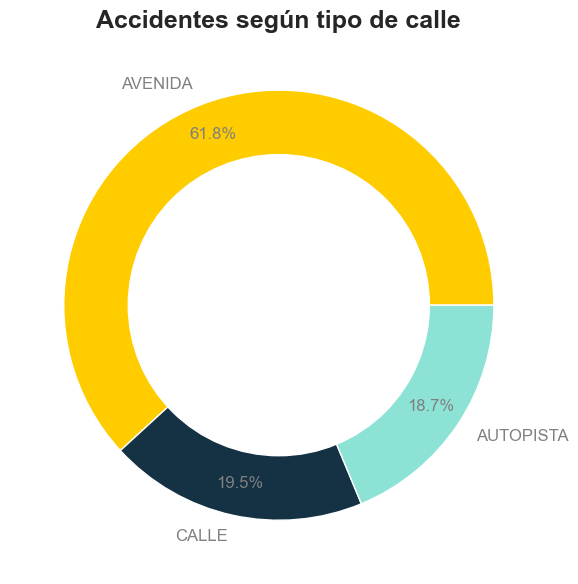

In [2230]:
import matplotlib.pyplot as plt

# Agrupar los datos por tipo de calle y contar la cantidad de accidentes
accidentes_por_tipo_calle = hechos['tipo_calle'].value_counts().reset_index(name='cantidad_accidentes')
accidentes_por_tipo_calle.columns = ['tipo_calle', 'cantidad_accidentes']

# Crear el gráfico tipo donut
plt.figure(figsize=(10, 6))
plt.pie(accidentes_por_tipo_calle['cantidad_accidentes'], labels=accidentes_por_tipo_calle['tipo_calle'], autopct='%1.1f%%', colors=sns.color_palette(colores, len(accidentes_por_tipo_calle)), pctdistance=0.85)

# Círculo en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Asegurar que los porcentajes sean visibles
for text in fig.gca().texts:
    text.set_size(12)
    text.set_color('grey')

# Título
plt.title('Accidentes según tipo de calle', fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()


**Insight #6:**
El gráfico tipo donut nos revela que los accidentes están distribuidos de manera significativa en diferentes tipos de calles:

1er lugar: Avenidas. Con diferencia se lleva el porcentaje mayor de los accidentes.ocurre en avenidas, lo que sugiere la necesidad de más medidas de seguridad y control del tráfico en estas vías. Probablemente esto se deba mayor tafico que un avenida, a su vez tiene más cruces pero se va a mayor velocidad que en una calle por ende la exposición al peligro es mayor.

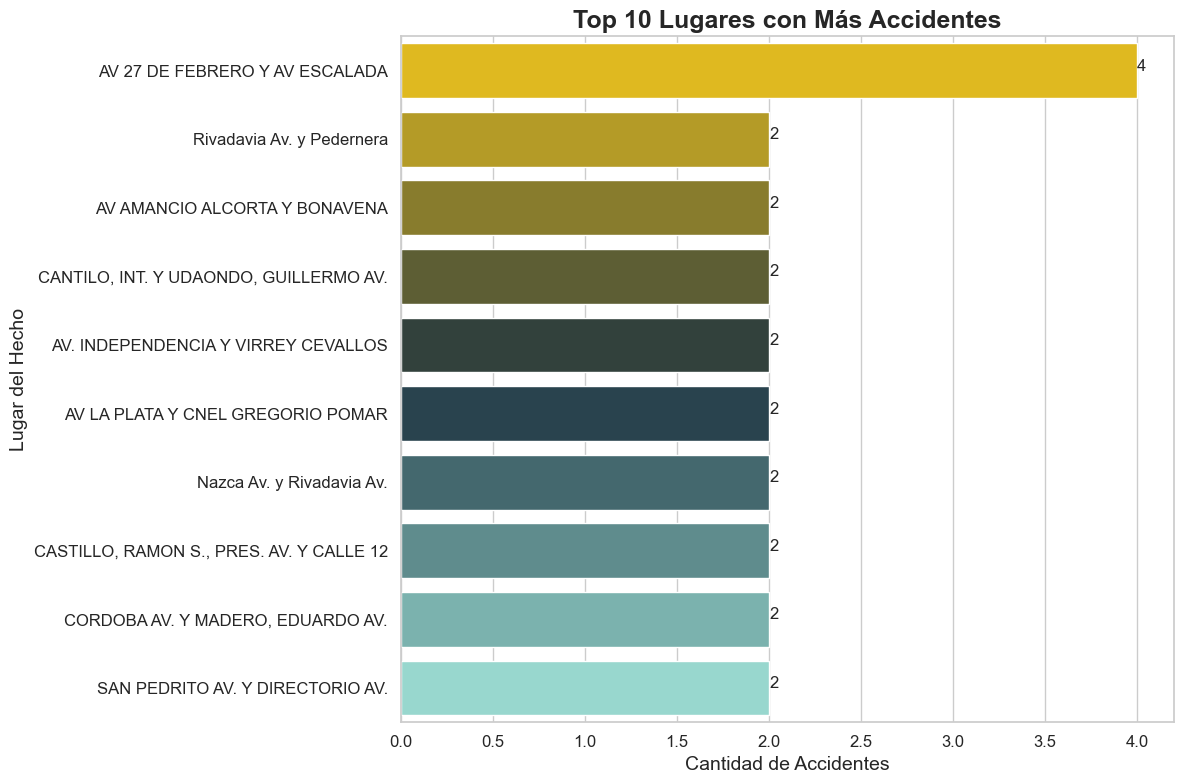

In [2231]:
# Agrupar los datos por lugar del hecho y contar la cantidad de accidentes
top_lugares = hechos['lugar_hecho'].value_counts().reset_index(name='cantidad_accidentes').head(10)
top_lugares.columns = ['lugar_hecho', 'cantidad_accidentes']

# Crear la paleta de 10 colores
n_colores_10 = 10  # Número de años únicos
gradiente_10 = LinearSegmentedColormap.from_list("custom_palette", colores, N=n_colores_10)
paleta6 = sns.color_palette(gradiente_10(np.linspace(0, 1, n_colores_10)))

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(data=top_lugares, y='lugar_hecho', x='cantidad_accidentes', palette=paleta6)

# Añadir anotaciones de la cantidad de accidentes
for index, value in enumerate(top_lugares['cantidad_accidentes']):
    plt.text(value, index, str(value))

# Título y etiquetas
plt.title('Top 10 Lugares con Más Accidentes', fontsize=18, fontweight='bold')
plt.xlabel('Cantidad de Accidentes', fontsize=14)
plt.ylabel('Lugar del Hecho', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


**Insight #7:**
De este último análisis notamos que en particular una calle tiene más accidentes que el resto. Quizas debería evaluarse el uso de semáforo u otras señalizaciones si es que no las tiene aún dada la repitencia del sitio y accidentes del tipo fatales. 

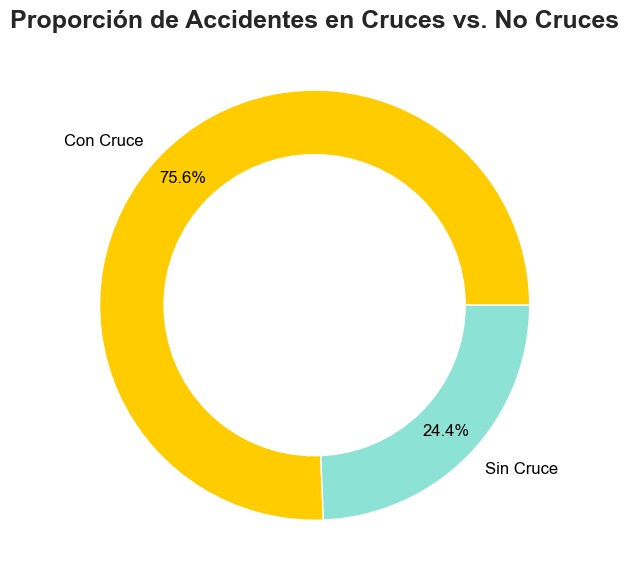

In [2232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna para indicar si es un cruce o no
hechos['es_cruce'] = hechos['cruce'].apply(lambda x: 'Sin Cruce' if x == 'SIN CRUCE' else 'Con Cruce')

# Agrupar los datos por si es cruce o no y contar la cantidad de accidentes
accidentes_por_cruce = hechos['es_cruce'].value_counts().reset_index(name='cantidad_accidentes')
accidentes_por_cruce.columns = ['es_cruce', 'cantidad_accidentes']

#Definir paleta de colores
colores2 = ["#FFCC00", "#8DE2D6"]

# Crear el gráfico tipo donut
plt.figure(figsize=(10, 6))
plt.pie(accidentes_por_cruce['cantidad_accidentes'], labels=accidentes_por_cruce['es_cruce'], autopct='%1.1f%%', colors=sns.color_palette(colores2, len(accidentes_por_cruce)), pctdistance=0.85)

# Círculo en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Asegurar que los porcentajes sean visibles
for text in fig.gca().texts:
    text.set_size(12)
    text.set_color('black')

plt.title('Proporción de Accidentes en Cruces vs. No Cruces', fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

**Highlight #8:**
El gráfico revela que casi 3/4 partes de los accidentes ocurre en cruces. Las intersecciones son puntos críticos para la seguridad vial, no es sorpresa dicho dato, y las razones son varias, principalmente: alto volumen de vehículos y peatones, los giros y cambios de dirección en los cruces aumentan el riesgo de accidentes y falta de visibilidad. A eso se agregaría imprudencia de parte de los vehiculos y peatones, quizas sobre ese punto se deberá seguir trabajando, con señales de transito, semáforos, etc.

## PERSONAS

Se trata de el otro factor vital para investigar, las zonas de mayor accidentes, tipo de vía, y horarios según comunas son tan solo algunas de las interrogantes que surgen. Conocer estos detalles es crucial a la hora de evaluar si las acciones que se vienen tomando en materia de prevención son adecuadas y efectivas o no y que nuevas problemáticas aprecen para así poder proponer mejoras.

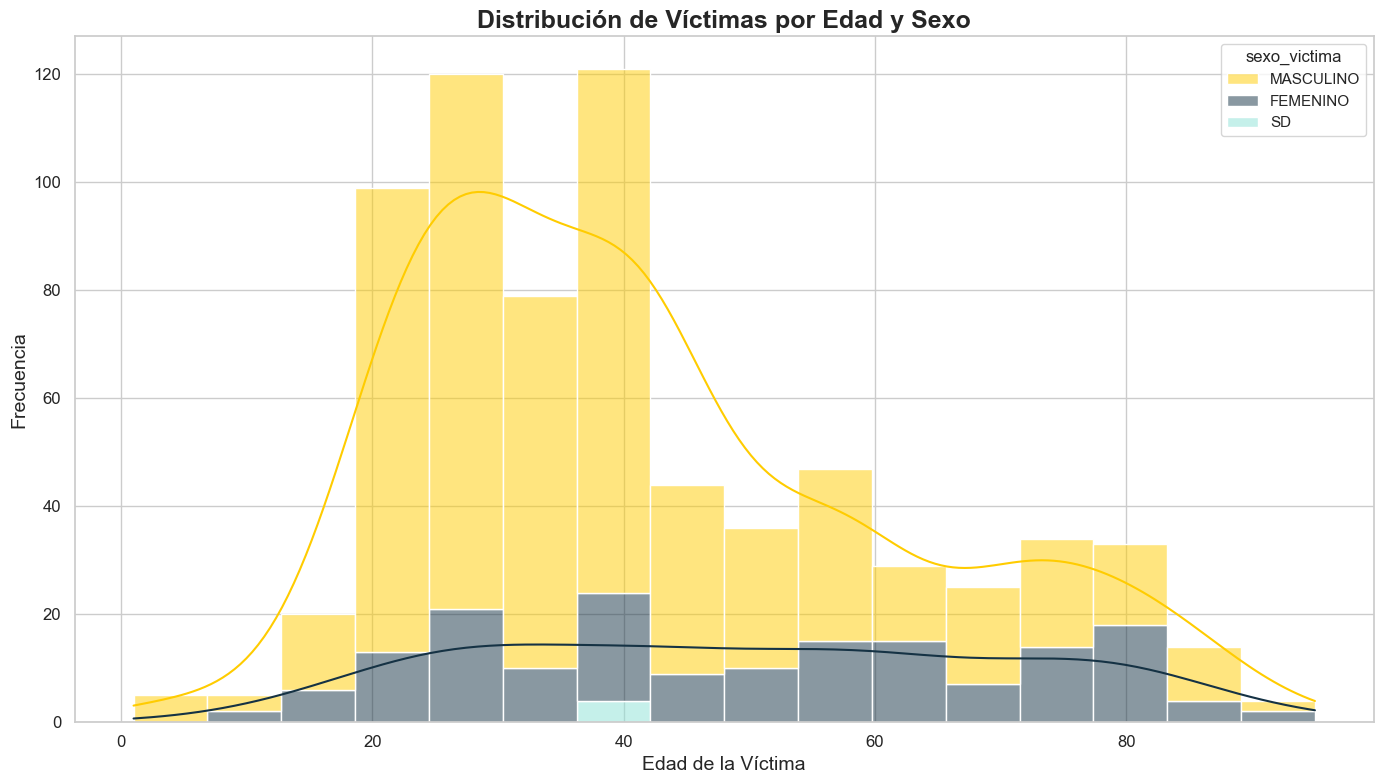

In [2233]:
# Crear un DataFrame fusionando hechos y víctimas
hechos_victimas = pd.merge(hechos, victimas, on='id')

# Reemplazar NaN en 'sexo_victima' con 'Sin datos'
hechos_victimas['sexo_victima'].fillna('Sin datos', inplace=True)

# Crear el histograma para edad y sexo de las víctimas
plt.figure(figsize=(14, 8))
hist_plot = sns.histplot(
    data=hechos_victimas, 
    x='edad_victima', 
    hue='sexo_victima', 
    multiple='stack', 
    kde=True, 
    palette=colores, 
    edgecolor=None,
    legend=True  # Deja que seaborn maneje la leyenda
)

# Título y etiquetas
plt.title('Distribución de Víctimas por Edad y Sexo', fontsize=18, fontweight='bold')
plt.xlabel('Edad de la Víctima', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
 
plt.show()

**Insight #9:**
El análisis muestra que una proporción significativa de las víctimas son hombres jóvenes, en el rango de 20 a 40 años. Esto puede deberse a varios factores: mayor exposición a actividades de riesgo y a pasar más tiempo conduciendo, especialmente por la noche; este grupo etario puede estar más inclinado a conducir a altas velocidades o bajo la influencia del alcohol; y vida nocturna, especialmente los fines de semana, puede estar más asociada con hombres jóvenes, aumentando la exposición a situaciones de riesgo en la vía pública. Nuevamente sería interesante investigar el consumo de alcohol  drogas en accidentes, en particular en este grupo.

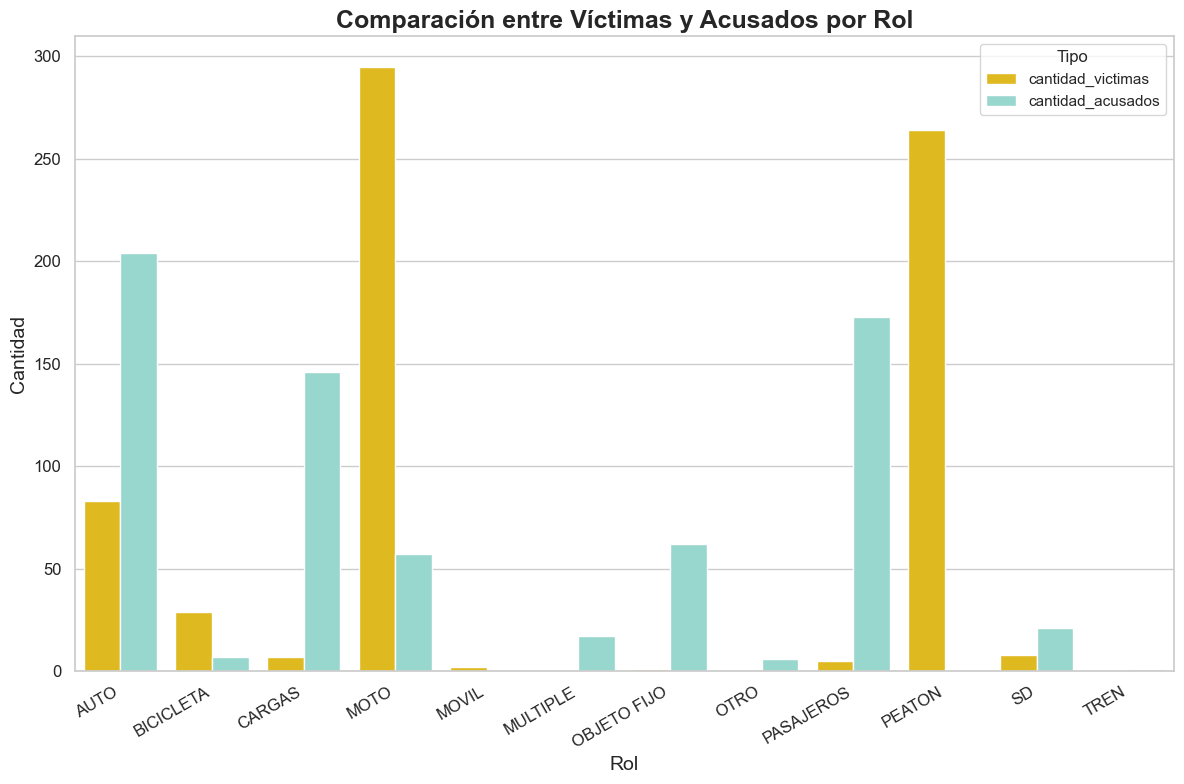

In [2234]:
# Crear los DataFrames de roles de víctimas y acusados
roles_victimas = hechos['victima'].value_counts().reset_index(name='cantidad_victimas')
roles_victimas.columns = ['rol', 'cantidad_victimas']

roles_acusados = hechos['acusado'].value_counts().reset_index(name='cantidad_acusados')
roles_acusados.columns = ['rol', 'cantidad_acusados']

# Unir los datos de víctimas y acusados
roles_combinados = pd.merge(roles_victimas, roles_acusados, on='rol', how='outer').fillna(0)

# Convertir los datos a formato largo para uso en seaborn
roles_long = pd.melt(roles_combinados, id_vars='rol', value_vars=['cantidad_victimas', 'cantidad_acusados'], var_name='tipo', value_name='cantidad')

# Crear el gráfico comparativo ajustado
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='rol', y='cantidad', hue='tipo', data=roles_long, palette=colores2, dodge=True)

# Título y etiquetas
plt.title('Comparación entre Víctimas y Acusados por Rol', fontsize=18, fontweight='bold')
plt.xlabel('Rol', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)  # Reducir la rotación a 30 grados
plt.yticks(fontsize=12)
plt.legend(title='Tipo', loc='upper right')
plt.tight_layout()
 
plt.show()

**Highlight #10:**
El análisis comparativo muestra cómo se distribuyen los roles entre las víctimas y los acusados en los accidentes de tráfico. Esto revela patrones interesantes:

Conductores de Motos y Peatones: son no solo los más frecuentes como victimas sino que también en su rol son más victimas que acusados, incluso en peaton ese valor es nulo.

Conductores de auto y pasajeros: Los conductores de autos por el contrario, al igual que pasajeros son con mayor frecuencia los acusados y en porcentaje causan más accidentes que las veces que son víctima. Entendemos que por pasajeros se refiere a autobuses, taxis, y otros medios de transporte, pero podria ser un tema pra indagar con mayor profundidad.

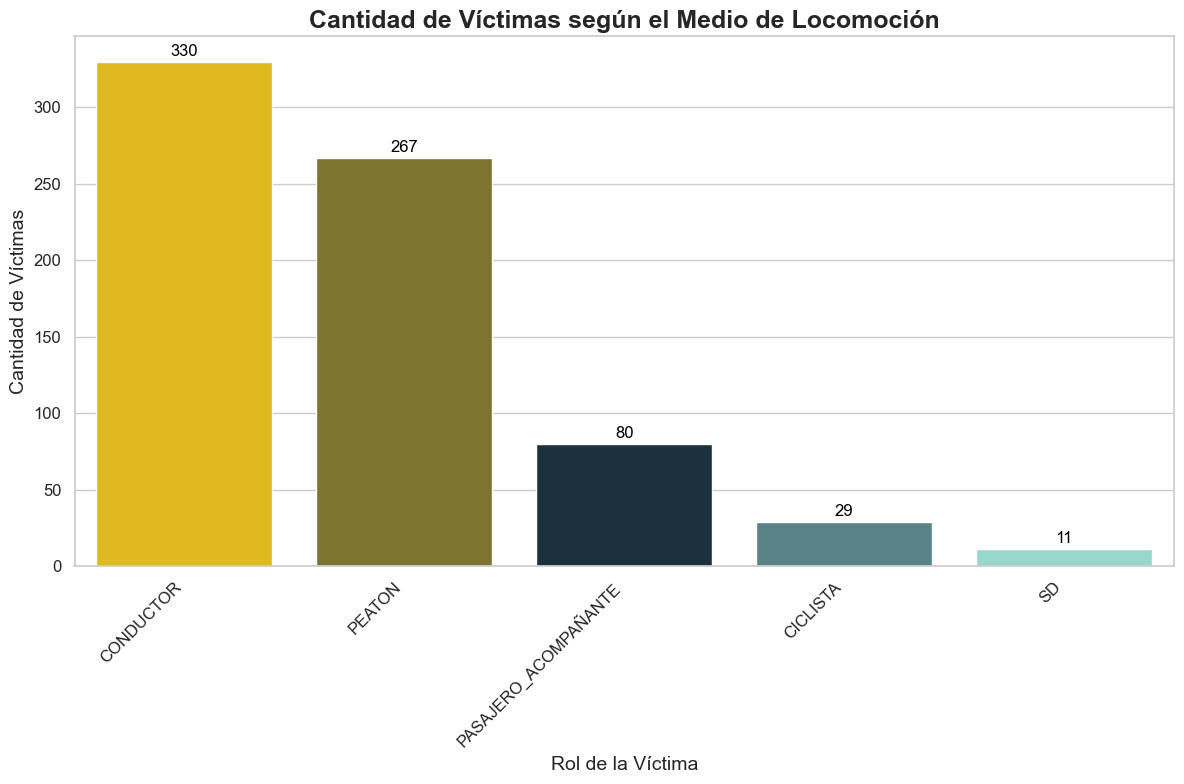

In [2235]:
# Agrupar los datos por rol de la víctima y contar la cantidad de víctimas
victimas_por_rol = victimas['rol_victima'].value_counts().reset_index(name='cantidad_victimas')
victimas_por_rol.columns = ['rol_victima', 'cantidad_victimas']

# Crear la paleta de 5 colores
n_colores_5 = 5  # Número de años únicos
gradiente_5 = LinearSegmentedColormap.from_list("custom_palette", colores, N=n_colores_5)
paleta7 = sns.color_palette(gradiente_5(np.linspace(0, 1, n_colores_5)))


# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=victimas_por_rol, x='rol_victima', y='cantidad_victimas', palette=paleta7)

# Añadir etiquetas de las cantidades
for index, value in enumerate(victimas_por_rol['cantidad_victimas']):
    plt.text(index, value + 2, str(value), color='black', ha="center", va='bottom', fontsize=12)

# Título y etiquetas
plt.title('Cantidad de Víctimas según el Medio de Locomoción', fontsize=18, fontweight='bold')
plt.xlabel('Rol de la Víctima', fontsize=14)
plt.ylabel('Cantidad de Víctimas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Highlight #11:**
En este caso notamos que el mayor número es de conductores, seguidos un poco más abajo por peatones, lo cual tiene lógica dado que son ambos grupos, uno como victima y el otro como acusado(en diferentes tipos de vehículos), quienes más presencia tienen en la tabla anterior. La diferencia en este caso con pasajero acompañante y conductor no queda clara por qué motivo es, pero bien puede tratarse de un conductor viajando solo en el vehiculo, lo cual tiende a ser la tendecia en grandes ciudades. Y ciclista si bien está expuesto figura bastante más abajo y puede deberse a la cantidad de ciclistas que circulan por un lado y el uso de ciclovias por otro.

## CONCLUSIONES

**#1: Impacto del COVID-19 en la Reducción de Accidentes.**
 El significativo descenso de accidentes en 2020 confirma la relación directa entre la reducción de la movilidad por el confinamiento y la disminución de siniestros viales. Sin embargo, esta no es una medida práctica a largo plazo.

**Conclusión #2: Estacionalidad y Factores Climáticos.** 
Los picos de accidentes en noviembre, diciembre y agosto reflejan una estacionalidad influenciada por factores como el aumento de actividades al aire libre y las fiestas de fin de año, así como las condiciones climáticas adversas que incrementan el riesgo.

**Conclusión #3: Riesgo Nocturno en Fines de Semana.** 
El aumento de accidentes en las madrugadas de fines de semana destaca la necesidad de medidas específicas como controles de alcoholemia y campañas de concientización dirigidas a prevenir accidentes nocturnos.

**Conclusión #4: Identificación de Zonas Peligrosas** 
Así vemos comunas como la 1 y 3 donde hay mayor incidencia de accidentes. La alta incidencia de accidentes en comunas densamente pobladas y con alto tráfico sugiere la necesidad de mejorar la infraestructura vial y la seguridad en estas zonas.

**Conclusión #5: Peligro en Avenidas y Cruces** 
La elevada proporción de accidentes en avenidas segun el tipo de calle y en cruces de esquina subraya la importancia de implementar medidas adicionales de seguridad y control en estos puntos críticos.

**Conclusión #6: Perfil de las Víctimas** 
El hecho de que la mayoría de las víctimas sean hombres jóvenes entre 20 y 40 años sugiere la necesidad de campañas de concientización y prevención dirigidas específicamente a este grupo de riesgo.

**Conclusión #7: Conductores y Peatones como Grupos Vulnerables** 
Los conductores de motos y peatones son los grupos más frecuentemente víctimas, lo que resalta la importancia de medidas de protección y concientización dirigidas a ellos.

**#8: La repetición de accidentes en una calle específica**
Esto indica la necesidad de evaluar la señalización y posiblemente implementar nuevas medidas de seguridad en ese lugar.